In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
df_mob = pd.read_csv("mobile_price_range_data (1).csv")
df_mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df_mob.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df_mob.duplicated().sum()

0

In [7]:
df_mob.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df_mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
#cosidering the features a normal costomer expects from a mobile phone let's define x
x = np.asarray(df_mob[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w'] 
       ]
)
x = x[0 : 10]



In [10]:
y = np.asarray(df_mob[['price_range']])
y = y.astype('int')
y = y[0:10]

In [11]:
from sklearn import preprocessing as pre
x = pre.StandardScaler().fit(x).transform(x)
x[0:10]

array([[-0.71246196, -1.22474487,  1.51259421, -1.        , -0.4001779 ,
        -1.        , -1.13978412,  1.38405797, -1.30208652, -1.8677833 ,
        -1.43425695,  0.73575139, -1.46939048,  0.78086881],
       [-0.39600863,  0.81649658, -0.76299   ,  1.        , -0.66696316,
         1.        ,  1.44297793, -0.5       , -0.47536492,  0.24277367,
         1.62337337,  0.82283513,  0.74855741, -0.46852129],
       [-1.20570486,  0.81649658, -0.76299   ,  1.        , -0.13339263,
         1.        ,  0.76921392, -0.17391304, -0.47536492,  1.0965357 ,
         0.94831213,  0.79309922, -0.91490351, -0.78086881],
       [-1.11377428,  0.81649658,  1.91416789, -1.        , -0.66696316,
        -1.        , -0.97134312, -0.68115942,  0.14467628,  0.98444962,
         1.12204113,  0.96939069,  0.47131393,  1.09321633],
       [ 1.01830791,  0.81649658,  0.17401526, -1.        ,  2.80124527,
         1.        ,  0.93765492, -0.31884058,  1.17807828,  0.96537114,
        -0.30253664, -0.47

# train test dataset

In [12]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size = 0.2 , random_state = 4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8, 14) (8, 1)
Test set: (2, 14) (2, 1)


# modelling (logistic regression)

In [13]:
from sklearn import linear_model as lm
LR = lm.LogisticRegression(C= 0.01 , solver = 'liblinear').fit(x_train,y_train)
LR

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

### predict y using x_test

In [14]:
yhat = LR.predict(x_test)
yhat

array([3, 1])

### predict probablity for all classes

In [15]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.24809131, 0.24716285, 0.25195982, 0.25278602],
       [0.25183883, 0.25412384, 0.24699679, 0.24704053]])

# accuracy evaluation (confusion matrix)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[0 0]
 [1 0]]


Confusion matrix, without normalization
[[0 0]
 [1 0]]


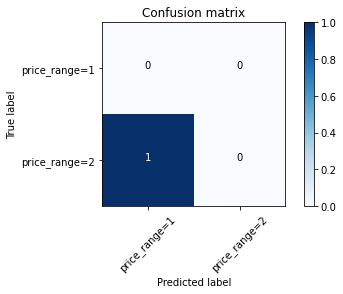

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['price_range=1','price_range=2'],normalize= False,  title='Confusion matrix')

In [18]:
df_mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# relation of singular features with price range

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.]]
intercept: [-0.99]


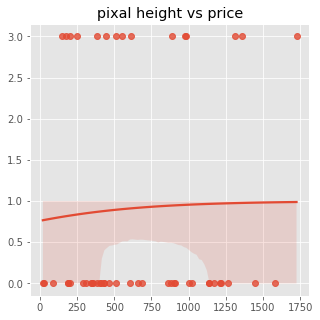

In [72]:
# logistic regression for pixal height
df_mob.loc[df_mob["price_range"]==1, "price_range"]=0
df_mob.loc[df_mob["price_range"]==2, "price_range"]=1
X = df_mob["px_height"].values.reshape(-1,1)
X = X[0:50]
Y = df_mob["price_range"].values.reshape(-1,1)
Y= Y[0:50]
logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

mpl.style.use('ggplot')
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)
plt.title("pixal height vs price")

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.]]
intercept: [-2.42]


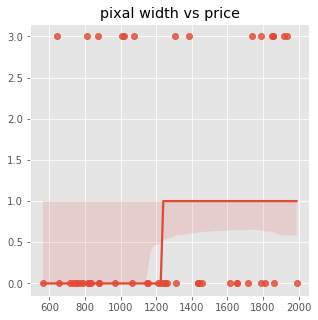

In [71]:
# logistic regression for pixal width
X = df_mob["px_width"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("pixal width vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.17]]
intercept: [-0.94]


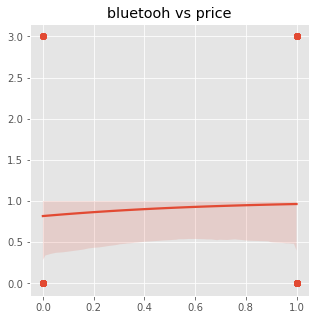

In [70]:
# logistic regression for bluetooth
X = df_mob["blue"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("bluetooh vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[-0.02]]
intercept: [-0.56]


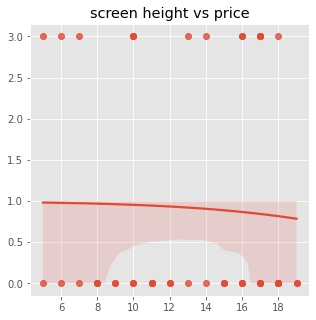

In [69]:
# logistic regression for screen height
X = df_mob["sc_h"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("screen height vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.09]]
intercept: [-1.33]


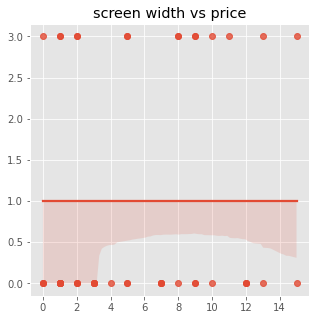

In [68]:
# logistic regression for screen width
X = df_mob["sc_w"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("screen width vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.96
coefficient: [[0.01]]
intercept: [-25.72]


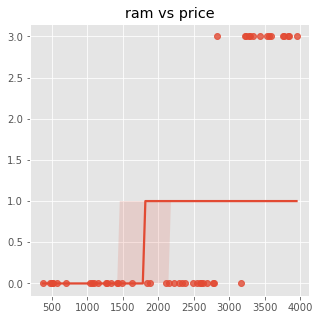

In [67]:
# logistic regression for ram
X = df_mob["ram"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("ram vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.]]
intercept: [-1.19]


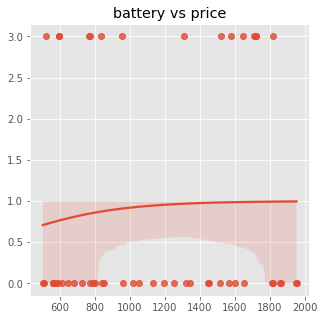

In [66]:
# logistic regression for battery
X = df_mob["battery_power"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("battery vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[-0.04]]
intercept: [-0.66]


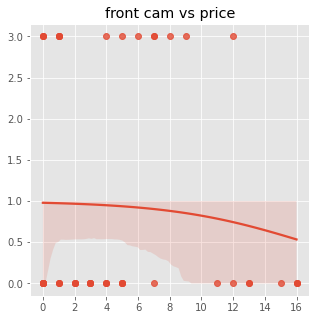

In [65]:
# logistic regression for front camera
X = df_mob["fc"].values.reshape(-1,1)
X = X[0:50]


logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("front cam vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[-0.01]]
intercept: [0.04]


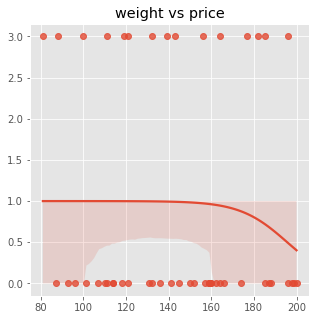

In [64]:
# logistic regression for mobile_weight
X = df_mob["mobile_wt"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("weight vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[-0.03]]
intercept: [-0.48]


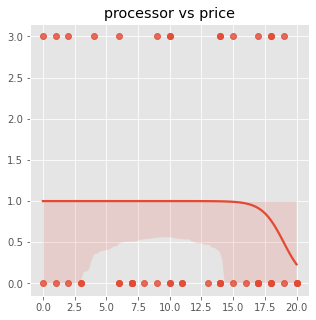

In [63]:
# logistic regression for primary camera
X = df_mob["pc"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("processor vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)

C:\anaconda\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


score: 0.7
coefficient: [[0.42]]
intercept: [-1.06]


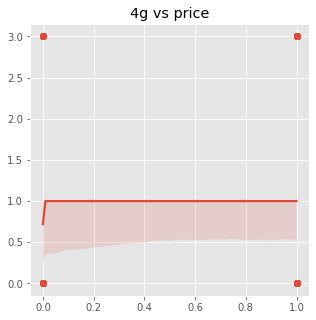

In [62]:
# logistic regression for 4g phone
X = df_mob["four_g"].values.reshape(-1,1)
X = X[0:50]

logr = lm.LogisticRegression()
logr.fit(X,np.ravel(Y.astype('int')))

plt.figure(figsize=(5,5))

plt.title("4g vs price")
sns.regplot(x=X, y=Y, data=df_mob, logistic=True)

print("score:",logr.score(X,Y))
print("coefficient:",logr.coef_)
print("intercept:",logr.intercept_)


# KNN classification 

In [73]:
df_mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# define X and Y

In [75]:
X = df_mob[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']].values.astype('float')
X = X[0:100]
Y = df_mob[['price_range']].values.astype('float')
Y = Y[0:100]

# normalize data

In [79]:
X = pre.StandardScaler().fit(X).transform(X).astype('float')
X[:5]

array([[-0.82, -1.  ,  0.72, -1.2 , -0.79, -1.08, -1.52,  0.06,  1.3 ,
        -1.09, -1.35, -1.56, -1.19,  0.34, -0.93,  0.3 ,  1.52, -2.06,
        -1.06,  1.04],
       [-0.4 ,  1.  , -1.28,  0.83, -1.  ,  0.92,  0.98,  0.44, -0.21,
        -0.64, -0.74,  0.49,  1.83,  0.41,  0.99, -0.62, -0.7 ,  0.48,
         0.94, -0.96],
       [-1.47,  1.  , -1.28,  0.83, -0.58,  0.92,  0.33,  1.19,  0.05,
         0.27, -0.74,  1.32,  1.16,  0.39, -0.45, -0.85, -0.33,  0.48,
         0.94, -0.96],
       [-1.34,  1.  ,  1.07, -1.2 , -1.  , -1.08, -1.36,  0.81, -0.36,
         0.72, -0.27,  1.22,  1.33,  0.54,  0.75,  0.52,  0.04,  0.48,
        -1.06, -0.96],
       [ 1.46,  1.  , -0.46, -1.2 ,  1.69,  0.92,  0.49,  0.06, -0.07,
        -1.09,  0.5 ,  1.2 , -0.07, -0.73, -1.17, -0.85,  0.78,  0.48,
         0.94, -0.96]])

# train, test split

In [83]:
X_train, X_test, y_train, y_test = tts(X , Y , test_size = 0.2 , random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 20) (80, 1)
Test set: (20, 20) (20, 1)


In [91]:
from sklearn.neighbors import KNeighborsClassifier

### accuracy evaluation for diffrent values of k

In [89]:
Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

array([0.7 , 0.7 , 0.75, 0.6 , 0.65, 0.6 , 0.6 , 0.6 , 0.65, 0.6 , 0.65])

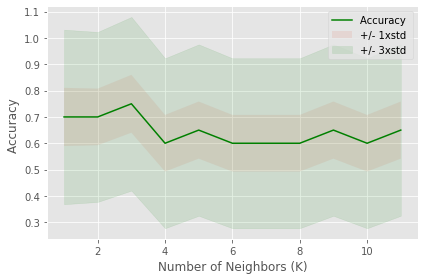

In [94]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [96]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.75 with k= 3


### we can see that when k = 3 we have highest accurecy of 0.75 , but we will go with k = 3 , because it give moderate accurecy and will be free from all sort of distortions like noise, outliers, mislabelling of data, and so on.


# classification

## KNN TRAINING

In [115]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(train_x,y_train)
neigh

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [116]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3., 0., 0., 0., 0.])

### accuracy evaluation

In [117]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8875
Test set Accuracy:  0.75


In [118]:
neigh.score(X_test,y_test)

0.75

In [119]:
cm = confusion_matrix(y_test, yhat)
cm

array([[12,  1],
       [ 4,  3]], dtype=int64)

Text(33.0, 0.5, 'truth')

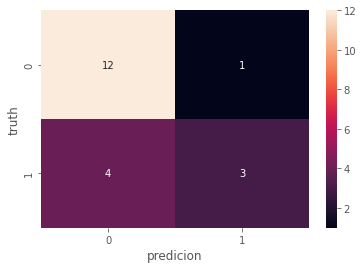

In [120]:
sns.heatmap(cm, annot =True)
plt.xlabel("predicion")
plt.ylabel("truth")

In [125]:
df_mob.value_counts()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram   sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
501            0     2.3          0         12  1       54          0.3    131        4        19  504        1089      2346  13    12    2          1        0             1     0              1
1494           0     1.9          0         2   1       47          0.4    129        2        9   207        1177      3202  13    1     14         1        0             0     3              1
1504           0     1.9          1         7   1       25          0.3    152        4        9   395        1853      1788  13    11    13         1        0             1     0              1
                     1.5          0         12  1       34          0.7    142        8        15  507        973       2806  7     2     7          1        0             1     0              1
1503           1     0.7      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


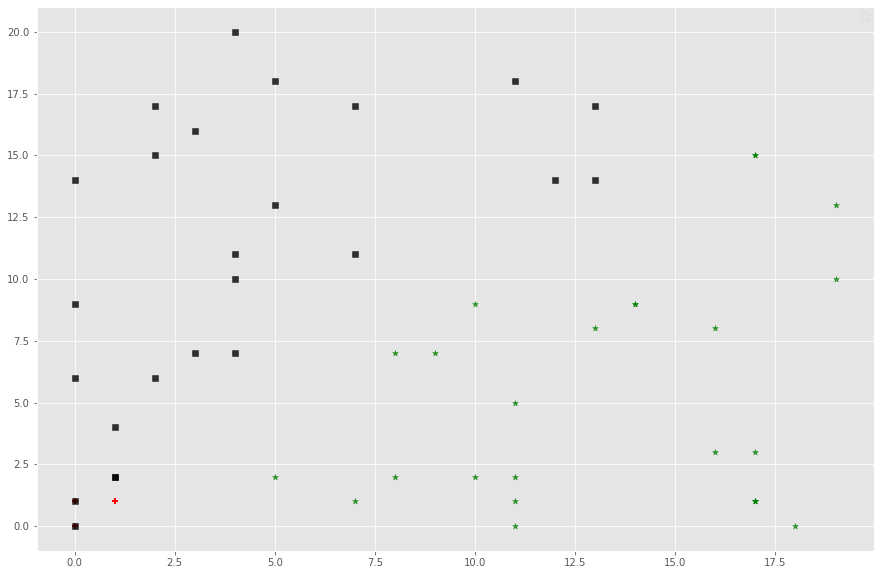

In [189]:
DATA = df_mob.head(25)
plt.figure(figsize=(15,10))
plt.scatter(DATA['four_g'],DATA['three_g'], color='red',marker = '+',alpha = 0.8)

plt.scatter(DATA['sc_h'],DATA['sc_w'], color='green',marker = '*',alpha = 0.8)

plt.scatter(DATA['fc'],DATA['pc'], color='black',marker = 's',alpha = 0.8)



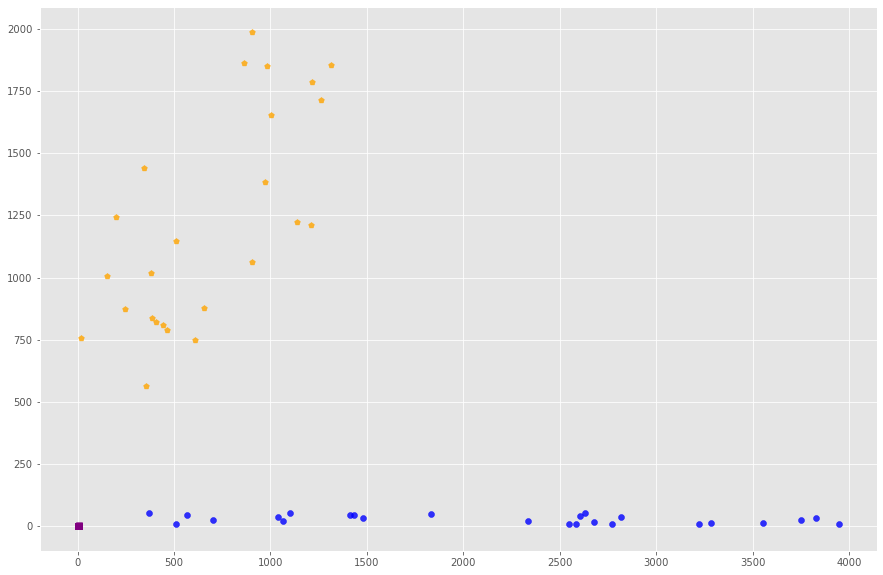

In [153]:
plt.figure(figsize=(15,10))
plt.scatter(DATA['ram'],DATA['int_memory'], color='blue',marker = 'o',alpha = 0.8)
plt.scatter(DATA['n_cores'],DATA['clock_speed'], color='purple',marker = ',',alpha = 0.8)
plt.scatter(DATA['px_height'],DATA['px_width'], color='orange',marker = 'p',alpha = 0.8)

# svm classifiers

In [163]:
X = df_mob[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
X = np.asarray(X)
X = X[:100]
Y = df_mob[['price_range']].astype('int')
Y = np.asarray(Y)
Y = Y[:100]

## train,test set

In [157]:
X_train, X_test, y_train, y_test = tts( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 20) (80, 1)
Test set: (20, 20) (20, 1)


# SVM with 'rbf' kernel

In [158]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [182]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=3)
f1_score(y_test, yhat, average='weighted') 

0.9490028490028489

In [184]:
yhat = clf.predict(X_test)
yhat [0:5]



array([0, 3, 0, 3, 0])

In [185]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat,pos_label=3))

Avg F1-score: 0.9490
Jaccard score: 0.8571


# Evaluation

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           3       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20

Confusion matrix, without normalization
[[13  0]
 [ 1  6]]


C:\Users\Shree\AppData\Local\Temp\ipykernel_2620\1847717057.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


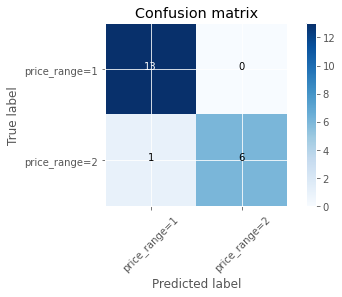

In [166]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['price_range=1','price_range=2'],normalize= False,  title='Confusion matrix')

# svm with 'linear' kernel

In [172]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 


C:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [178]:
jaccard_score(y_test, yhat,pos_label=3)
f1_score(y_test, yhat, average='weighted') 

0.9490028490028489

In [186]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 3, 0, 3, 0])

In [187]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat,pos_label=3))

Avg F1-score: 0.9490
Jaccard score: 0.8571


# Evaluation

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           3       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20

Confusion matrix, without normalization
[[13  0]
 [ 1  6]]


C:\Users\Shree\AppData\Local\Temp\ipykernel_2620\1847717057.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


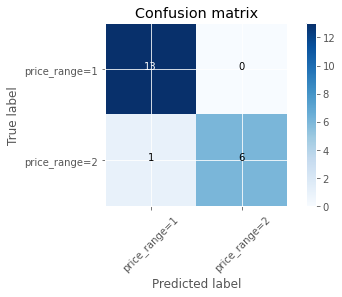

In [188]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['price_range=1','price_range=2'],normalize= False,  title='Confusion matrix')